In [ ]:
import time
start_time = round(time.time()*1000)
print("Operations Start Time:",start_time)

Operations Start Time: 1668345819603


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/My Drive/heartstroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.shape

(5110, 12)

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

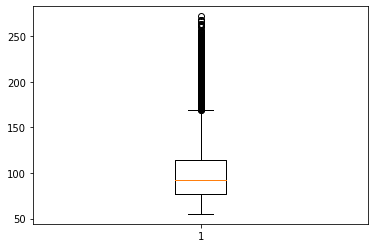

In [ ]:
plt.boxplot(df['avg_glucose_level'])
plt.show()

In [ ]:
q1,q2,q3=df['avg_glucose_level'].quantile([0.25,0.5,0.75])
print(q1,q2,q3)

77.245 91.88499999999999 114.09


In [ ]:
Iqr=q3-q1
cut=Iqr*1.5
lower,upper=q1-cut,q3+cut
outliers=[x for x in df['avg_glucose_level'] if (x<lower) or (x>upper)]

In [ ]:
print(outliers)
print(len(outliers))

[228.69, 202.21, 171.23, 174.12, 186.21, 219.84, 214.09, 191.61, 221.29, 217.08, 193.94, 233.29, 228.7, 208.3, 189.84, 195.23, 211.78, 212.08, 196.92, 252.72, 219.72, 213.03, 243.58, 197.54, 196.71, 237.75, 194.99, 180.93, 185.17, 221.58, 179.12, 228.56, 240.09, 226.98, 235.63, 240.59, 190.32, 231.61, 191.82, 224.1, 216.94, 259.63, 249.31, 219.91, 200.59, 190.14, 182.99, 206.09, 263.32, 207.28, 194.37, 199.2, 221.79, 239.07, 169.67, 223.83, 231.56, 221.89, 195.71, 203.87, 185.49, 213.22, 215.94, 209.86, 205.77, 271.74, 200.62, 242.52, 175.29, 208.65, 205.33, 210.4, 199.86, 219.73, 250.89, 205.35, 216.58, 184.4, 199.84, 218.46, 211.06, 197.28, 233.94, 247.51, 210.95, 243.53, 205.84, 198.21, 206.72, 214.45, 190.7, 203.04, 242.3, 220.49, 218.46, 216.7, 234.58, 235.85, 243.5, 182.2, 229.92, 215.6, 239.64, 200.28, 205.23, 209.58, 210.78, 251.6, 213.37, 223.36, 178.29, 203.81, 205.26, 211.03, 225.47, 180.63, 227.1, 201.76, 170.05, 217.3, 196.01, 184.15, 198.69, 186.17, 183.45, 210.48, 193.83

In [ ]:
trgt=[]
count = 0
for i in outliers:
  print(df.loc[df['avg_glucose_level']==i]['stroke']==1)
trgt

0    True
Name: stroke, dtype: bool
1        True
2934    False
Name: stroke, dtype: bool
3    True
Name: stroke, dtype: bool
4    True
Name: stroke, dtype: bool
5    True
Name: stroke, dtype: bool
13    True
Name: stroke, dtype: bool
14    True
Name: stroke, dtype: bool
16    True
Name: stroke, dtype: bool
17    True
Name: stroke, dtype: bool
19    True
Name: stroke, dtype: bool
20    True
Name: stroke, dtype: bool
21    True
Name: stroke, dtype: bool
22       True
1414    False
Name: stroke, dtype: bool
23    True
Name: stroke, dtype: bool
27    True
Name: stroke, dtype: bool
28    True
Name: stroke, dtype: bool
29    True
Name: stroke, dtype: bool
30    True
Name: stroke, dtype: bool
32    True
Name: stroke, dtype: bool
33    True
Name: stroke, dtype: bool
36    True
Name: stroke, dtype: bool
44    True
Name: stroke, dtype: bool
45    True
Name: stroke, dtype: bool
54    True
Name: stroke, dtype: bool
55    True
Name: stroke, dtype: bool
57    True
Name: stroke, dtype: bool
58    Tr

[]

In [ ]:
d_mean,d_std=(df['avg_glucose_level'].mean()),(df['avg_glucose_level'].std())

In [ ]:
print(round(d_mean,2),round(d_std,2))

106.15 45.28


In [ ]:
cut_off=d_std*3
low,up=d_mean-cut_off,d_mean+cut_off
outliers=[x for x in df['avg_glucose_level'] if (x<low) or (x>up)]

In [ ]:
print(outliers)
print(len(outliers))

[252.72, 243.58, 259.63, 249.31, 263.32, 271.74, 242.52, 250.89, 247.51, 243.53, 242.3, 243.5, 251.6, 247.69, 250.2, 254.6, 254.63, 246.34, 251.46, 267.76, 246.53, 244.28, 251.99, 253.16, 242.84, 249.29, 242.94, 247.48, 266.59, 243.73, 243.59, 250.8, 255.17, 267.61, 260.85, 248.37, 263.56, 247.97, 248.24, 253.93, 254.95, 247.87, 261.67, 256.74, 244.3, 242.62, 243.52, 267.6, 253.86]
49


In [ ]:
trgt=[]
for i in outliers:
  print(df.loc[df['avg_glucose_level']==i]['stroke']==1)
trgt

33    True
Name: stroke, dtype: bool
45    True
Name: stroke, dtype: bool
122    True
Name: stroke, dtype: bool
123    True
Name: stroke, dtype: bool
135    True
Name: stroke, dtype: bool
193    True
Name: stroke, dtype: bool
196    True
Name: stroke, dtype: bool
220    True
Name: stroke, dtype: bool
243    True
Name: stroke, dtype: bool
256    False
Name: stroke, dtype: bool
303    False
Name: stroke, dtype: bool
330    False
Name: stroke, dtype: bool
386    False
Name: stroke, dtype: bool
552    False
Name: stroke, dtype: bool
755    False
Name: stroke, dtype: bool
785    False
Name: stroke, dtype: bool
1067    False
Name: stroke, dtype: bool
1070    False
Name: stroke, dtype: bool
1113    False
Name: stroke, dtype: bool
1207    False
Name: stroke, dtype: bool
1384    False
Name: stroke, dtype: bool
1436    False
Name: stroke, dtype: bool
1453    False
Name: stroke, dtype: bool
1529    False
Name: stroke, dtype: bool
1626    False
Name: stroke, dtype: bool
2182    False
Name: stroke,

[]

# **Handling Missing Values**

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
print(round(df['bmi'].mean(),1))

28.9


In [ ]:
df['bmi'].fillna(28.9,inplace = True)

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.drop(['id'],axis = 1,inplace = True)

# **Conversion of Categorical Data into Numerical Data**

Gender, Ever_Married, Work_Type, Residence_type and Smoking_Status are categorical

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df['gender'] = label_encoder.fit_transform(df['gender'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df['gender'].value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64

In [ ]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [ ]:
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,Rural,202.21,28.9,never smoked,1
2,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df['ever_married'].value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

In [ ]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,3,Rural,202.21,28.9,never smoked,1
2,1,80.0,0,1,1,2,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,2,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,1,3,Rural,174.12,24.0,never smoked,1


In [ ]:
df['work_type'].value_counts()

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

In [ ]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,3,0,202.21,28.9,never smoked,1
2,1,80.0,0,1,1,2,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,2,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,3,0,174.12,24.0,never smoked,1


In [ ]:
df['Residence_type'].value_counts()

1    2596
0    2514
Name: Residence_type, dtype: int64

In [ ]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.9,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [ ]:
df['smoking_status'].value_counts()

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64

df1 = pd.get_dummies(df,columns = ['work_type','smoking_status'])

df1.head()

In [ ]:
df.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

# **Scaling of the Data**

Standard Scaler => (x-mean)/std

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
data = df.drop(['stroke'],axis = 1)
data.shape

(5110, 10)

In [ ]:
columns = ['gender','age','hypertension','heart_disease','ever_married', 'work_type', 'Residence_type','avg_glucose_level',
           'bmi','smoking_status']

In [ ]:
X = pd.DataFrame(scaler.fit_transform(data),columns = columns)

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.188073,1.051434,-0.328602,4.185032,0.723884,-0.153836,0.984080,2.706375,1.001199,-0.351781
1,-0.840344,0.786070,-0.328602,-0.238947,0.723884,0.763438,-1.016178,2.121559,0.000844,0.581552
2,1.188073,1.626390,-0.328602,4.185032,0.723884,-0.153836,-1.016178,-0.005028,0.468543,0.581552
3,-0.840344,0.255342,-0.328602,-0.238947,0.723884,-0.153836,0.984080,1.437358,0.715384,1.514885
4,-0.840344,1.582163,3.043196,-0.238947,0.723884,0.763438,-1.016178,1.501184,-0.635746,0.581552


In [ ]:
y = df['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

# **Sampling Techniques**

# **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
from collections import Counter

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 4861, 1: 249})
Resample dataset shape Counter({1: 4861, 0: 4861})


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
def measure(model,X, Y):
  from sklearn.metrics import make_scorer

  accuracy = cross_val_score(model, X, Y, scoring ='accuracy', cv = 10)
  precision = cross_val_score(model, X, Y, scoring = 'precision', cv = 10)
  recall = cross_val_score(model, X, Y, scoring = 'recall', cv = 10)
  F1 = cross_val_score(model, X, Y, scoring = 'f1', cv = 10)

  sol = []
  sol.append(accuracy.mean())
  sol.append(precision.mean())
  sol.append(recall.mean())
  sol.append(F1.mean())

  return sol

def measure(model,X, Y):

  accuracy = cross_val_score(model, X, Y, scoring='accuracy', cv = 10)

  precision = cross_val_score(model, X, Y, scoring='precision', cv = 10)

  recall = cross_val_score(model, X, Y, scoring='recall', cv = 10)

  F1 = cross_val_score(model, X, Y, scoring='f1', cv = 10)

  sol = []
  sol.append(accuracy.mean())
  sol.append(precision.mean())
  sol.append(recall.mean())
  sol.append(F1.mean())

  return sol


**SMOTE using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
ans = measure(log, x_smote, y_smote)

print("Acuracy using SMOTE and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using SMOTE and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using SMOTE and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using SMOTE and Logistic Regression is : ",round(ans[3]*100,4))

Acuracy using SMOTE and Logistic Regression is :  78.8727
Precision using SMOTE and Logistic Regression is :  76.6141
Recall using SMOTE and Logistic Regression is :  83.1522
F1 Score using SMOTE and Logistic Regression is :  79.7375


**SMOTE using Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
ans = measure(clf, x_smote, y_smote)

print("Acuracy using SMOTE and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using SMOTE and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using SMOTE and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using SMOTE and Decision Tree is : ",round(ans[3]*100,4))

Acuracy using SMOTE and Decision Tree is :  91.6385
Precision using SMOTE and Decision Tree is :  90.2108
Recall using SMOTE and Decision Tree is :  92.6593
F1 Score using SMOTE and Decision Tree is :  91.4923


**SMOTE using SVM**

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
ans = measure(cl, x_smote, y_smote)

print("Acuracy using SMOTE and SVM is : ",round(ans[0]*100,4))
print("Precision using SMOTE and SVM is : ",round(ans[1]*100,4))

print("Recall using SMOTE and SVM is : ",round(ans[2]*100,4))
print("F1 Score using SMOTE and SVM is : ",round(ans[3]*100,4))

Acuracy using SMOTE and SVM is :  84.2625
Precision using SMOTE and SVM is :  79.9231
Recall using SMOTE and SVM is :  91.5454
F1 Score using SMOTE and SVM is :  85.3312


**SMOTE using Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
ans = measure(gnb, x_smote, y_smote)

print("Acuracy using SMOTE and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using SMOTE and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using SMOTE and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using SMOTE and Naive Bayes is : ",round(ans[3]*100,4))

Acuracy using SMOTE and Naive Bayes is :  77.7619
Precision using SMOTE and Naive Bayes is :  75.1238
Recall using SMOTE and Naive Bayes is :  83.0699
F1 Score using SMOTE and Naive Bayes is :  78.8815


**SMOTE using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0) #max_depth=2,

In [ ]:
ans = measure(rf, x_smote, y_smote)

print("Acuracy using SMOTE and Random Forest is : ",round(ans[0]*100,4))
print("Precision using SMOTE and Random Forest is : ",round(ans[1]*100,4))

print("Recall using SMOTE and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using SMOTE and Random Forest is : ",round(ans[3]*100,4))

Acuracy using SMOTE and Random Forest is :  95.9891
Precision using SMOTE and Random Forest is :  95.062
Recall using SMOTE and Random Forest is :  97.0199
F1 Score using SMOTE and Random Forest is :  95.9745


**SMOTE using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
ans = measure(knn, x_smote, y_smote)

print("Acuracy using SMOTE and KNN is : ",round(ans[0]*100,4))
print("Precision using SMOTE and KNN is : ",round(ans[1]*100,4))

print("Recall using SMOTE and KNN is : ",round(ans[2]*100,4))
print("F1 Score using SMOTE and KNN is : ",round(ans[3]*100,4))

Acuracy using SMOTE and KNN is :  90.434
Precision using SMOTE and KNN is :  84.5905
Recall using SMOTE and KNN is :  98.9095
F1 Score using SMOTE and KNN is :  91.1858


# **Random Under Sampling with Imblearn**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 4861, 1: 249})
Resample dataset shape Counter({0: 249, 1: 249})


**Random Undersampling with Imblearn using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
ans = measure(log, x_rus, y_rus)

print("Acuracy using Random Undersampling - Imblearn and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using Random Undersampling - Imblearn and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using Random Undersampling - Imblearn and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using Random Undersampling - Imblearn and Logistic Regression is : ",round(ans[3]*100,4))

Acuracy using Random Undersampling - Imblearn and Logistic Regression is :  77.502
Precision using Random Undersampling - Imblearn and Logistic Regression is :  75.9143
Recall using Random Undersampling - Imblearn and Logistic Regression is :  81.5333
F1 Score using Random Undersampling - Imblearn and Logistic Regression is :  78.3853


**Random Undersampling with Imblearn using Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
ans = measure(clf, x_rus, y_rus)

print("Acuracy using Random Undersampling - Imblearn and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using Random Undersampling - Imblearn and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using Random Undersampling - Imblearn and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using Random Undersampling - Imblearn and Decision Tree is : ",round(ans[3]*100,4))

Acuracy using Random Undersampling - Imblearn and Decision Tree is :  72.6857
Precision using Random Undersampling - Imblearn and Decision Tree is :  74.9903
Recall using Random Undersampling - Imblearn and Decision Tree is :  69.5
F1 Score using Random Undersampling - Imblearn and Decision Tree is :  71.5966


**Random Undersampling with Imblearn using SVM**

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
ans = measure(cl, x_rus, y_rus)

print("Acuracy using Random Undersampling - Imblearn and SVM is : ",round(ans[0]*100,4))
print("Precision using Random Undersampling - Imblearn and SVM is : ",round(ans[1]*100,4))

print("Recall using Random Undersampling - Imblearn and SVM is : ",round(ans[2]*100,4))
print("F1 Score using Random Undersampling - Imblearn and SVM is : ",round(ans[3]*100,4))

Acuracy using Random Undersampling - Imblearn and SVM is :  76.5061
Precision using Random Undersampling - Imblearn and SVM is :  73.597
Recall using Random Undersampling - Imblearn and SVM is :  83.5333
F1 Score using Random Undersampling - Imblearn and SVM is :  78.0141


**Random Undersampling with Imblearn using Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
ans = measure(gnb, x_rus, y_rus)

print("Acuracy using Random Undersampling - Imblearn and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using Random Undersampling - Imblearn and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using Random Undersampling - Imblearn and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using Random Undersampling - Imblearn and Naive Bayes is : ",round(ans[3]*100,4))

Acuracy using Random Undersampling - Imblearn and Naive Bayes is :  75.302
Precision using Random Undersampling - Imblearn and Naive Bayes is :  76.829
Recall using Random Undersampling - Imblearn and Naive Bayes is :  73.0833
F1 Score using Random Undersampling - Imblearn and Naive Bayes is :  74.6845


**Random Undersampling with Imblearn using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)

In [ ]:
ans = measure(rf, x_rus, y_rus)

print("Acuracy using Random Undersampling - Imblearn and Random Forest is : ",round(ans[0]*100,4))
print("Precision using Random Undersampling - Imblearn and Random Forest is : ",round(ans[1]*100,4))

print("Recall using Random Undersampling - Imblearn and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using Random Undersampling - Imblearn and Random Forest is : ",round(ans[3]*100,4))

Acuracy using Random Undersampling - Imblearn and Random Forest is :  79.5224
Precision using Random Undersampling - Imblearn and Random Forest is :  78.1591
Recall using Random Undersampling - Imblearn and Random Forest is :  82.3333
F1 Score using Random Undersampling - Imblearn and Random Forest is :  80.0806


**Random Undersampling with Imblearn using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
ans = measure(knn, x_rus, y_rus)

print("Acuracy using Random Undersampling - Imblearn and KNN is : ",round(ans[0]*100,4))
print("Precision using Random Undersampling - Imblearn and KNN is : ",round(ans[1]*100,4))

print("Recall using Random Undersampling - Imblearn and KNN is : ",round(ans[2]*100,4))
print("F1 Score using Random Undersampling - Imblearn and KNN is : ",round(ans[3]*100,4))

Acuracy using Random Undersampling - Imblearn and KNN is :  71.2898
Precision using Random Undersampling - Imblearn and KNN is :  70.801
Recall using Random Undersampling - Imblearn and KNN is :  73.0833
F1 Score using Random Undersampling - Imblearn and KNN is :  71.5746


# **Undersampling Tomek Links**

In [ ]:
from imblearn.under_sampling import TomekLinks

undersample = TomekLinks()
x_tl, y_tl = undersample.fit_resample(X, y)

In [ ]:
from collections import Counter

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_tl))

Original dataset shape Counter({0: 4861, 1: 249})
Resample dataset shape Counter({0: 4735, 1: 249})


**Undersampling with Tomek Links using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
y_tl

0       1
1       1
2       1
3       1
4       1
       ..
4979    0
4980    0
4981    0
4982    0
4983    0
Name: stroke, Length: 4984, dtype: int64

In [ ]:
ans = measure(log, x_tl, y_tl)

print("Acuracy using Undersampling Tomek Links and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using Undersampling Tomek Links and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using Undersampling Tomek Links and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using Undersampling Tomek Links and Logistic Regression is : ",round(ans[3]*100,4))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

Acuracy using Undersampling Tomek Links and Logistic Regression is :  95.0442
Precision using Undersampling Tomek Links and Logistic Regression is :  20.0
Recall using Undersampling Tomek Links and Logistic Regression is :  0.8
F1 Score using Undersampling Tomek Links and Logistic Regression is :  1.5385


**Undersampling with Tomek Links using Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
ans = measure(clf, x_tl, y_tl)

print("Acuracy using Undersampling Tomek Links and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using Undersampling Tomek Links and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using Undersampling Tomek Links and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using Undersampling Tomek Links and Decision Tree is : ",round(ans[3]*100,4))

Acuracy using Undersampling Tomek Links and Decision Tree is :  91.1109
Precision using Undersampling Tomek Links and Decision Tree is :  18.1116
Recall using Undersampling Tomek Links and Decision Tree is :  20.8333
F1 Score using Undersampling Tomek Links and Decision Tree is :  18.6312


**Undersampling with Tomek Links using SVM**

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
ans = measure(cl, x_tl, y_tl)

print("Acuracy using Undersampling Tomek Links and SVM is : ",round(ans[0]*100,4))
print("Precision using Undersampling Tomek Links and SVM is : ",round(ans[1]*100,4))

print("Recall using Undersampling Tomek Links and SVM is : ",round(ans[2]*100,4))
print("F1 Score using Undersampling Tomek Links and SVM is : ",round(ans[3]*100,4))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

Acuracy using Undersampling Tomek Links and SVM is :  95.004
Precision using Undersampling Tomek Links and SVM is :  0.0
Recall using Undersampling Tomek Links and SVM is :  0.0
F1 Score using Undersampling Tomek Links and SVM is :  0.0


**Undersampling with Tomek Links using Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
ans = measure(gnb, x_tl, y_tl)

print("Acuracy using Random Undersampling - Imblearn and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using Random Undersampling - Imblearn and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using Random Undersampling - Imblearn and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using Random Undersampling - Imblearn and Naive Bayes is : ",round(ans[3]*100,4))

Acuracy using Random Undersampling - Imblearn and Naive Bayes is :  86.9182
Precision using Random Undersampling - Imblearn and Naive Bayes is :  16.7694
Recall using Random Undersampling - Imblearn and Naive Bayes is :  41.3167
F1 Score using Random Undersampling - Imblearn and Naive Bayes is :  23.7262


**Undersampling with Tomek Links using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
ans = measure(rf, x_tl, y_tl)

print("Acuracy using Random Undersampling - Imblearn and Random Forest is : ",round(ans[0]*100,4))
print("Precision using Random Undersampling - Imblearn and Random Forest is : ",round(ans[1]*100,4))

print("Recall using Random Undersampling - Imblearn and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using Random Undersampling - Imblearn and Random Forest is : ",round(ans[3]*100,4))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acuracy using Random Undersampling - Imblearn and Random Forest is :  95.024
Precision using Random Undersampling - Imblearn and Random Forest is :  55.0
Recall using Random Undersampling - Imblearn and Random Forest is :  2.4
F1 Score using Random Undersampling - Imblearn and Random Forest is :  4.5869


**Undersampling with Tomek Links using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
ans = measure(knn, x_tl, y_tl)

print("Acuracy using Random Undersampling - Imblearn and KNN is : ",round(ans[0]*100,4))
print("Precision using Random Undersampling - Imblearn and KNN is : ",round(ans[1]*100,4))

print("Recall using Random Undersampling - Imblearn and KNN is : ",round(ans[2]*100,4))
print("F1 Score using Random Undersampling - Imblearn and KNN is : ",round(ans[3]*100,4))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acuracy using Random Undersampling - Imblearn and KNN is :  94.6831
Precision using Random Undersampling - Imblearn and KNN is :  9.1667
Recall using Random Undersampling - Imblearn and KNN is :  1.2
F1 Score using Random Undersampling - Imblearn and KNN is :  2.1182


# **Condensed Nearest Neighbor(CNN) Rule**

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
condense = CondensedNearestNeighbour(n_neighbors=2)
x_condense,y_condense = condense.fit_resample(X,y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_condense))

Original dataset shape Counter({0: 4861, 1: 249})
Resample dataset shape Counter({0: 374, 1: 249})


**Condensed Nearest Neighbor using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
ans = measure(log, x_condense, y_condense)

print("Acuracy using CNN and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using CNN and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using CNN and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using CNN and Logistic Regression is : ",round(ans[3]*100,4))

Acuracy using CNN and Logistic Regression is :  59.0579
Precision using CNN and Logistic Regression is :  50.6723
Recall using CNN and Logistic Regression is :  25.3
F1 Score using CNN and Logistic Regression is :  32.8672


**Condensed Nearest Neighbor using Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
ans = measure(clf, x_condense, y_condense)

print("Acuracy using CNN and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using CNN and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using CNN and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using CNN and Decision Tree is : ",round(ans[3]*100,4))

Acuracy using CNN and Decision Tree is :  51.3287
Precision using CNN and Decision Tree is :  37.7011
Recall using CNN and Decision Tree is :  37.2833
F1 Score using CNN and Decision Tree is :  37.8896


**Condensed Nearest Neighbor using SVM**

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
ans = measure(cl, x_condense, y_condense)

print("Acuracy using CNN and SVM is : ",round(ans[0]*100,4))
print("Precision using CNN and SVM is : ",round(ans[1]*100,4))

print("Recall using CNN and SVM is : ",round(ans[2]*100,4))
print("F1 Score using CNN and SVM is : ",round(ans[3]*100,4))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acuracy using CNN and SVM is :  55.6836
Precision using CNN and SVM is :  5.25
Recall using CNN and SVM is :  1.6
F1 Score using CNN and SVM is :  2.4156


**Condensed Nearest Neighbor using Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
ans = measure(gnb, x_condense, y_condense)

print("Acuracy using CNN and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using CNN and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using CNN and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using CNN and Naive Bayes is : ",round(ans[3]*100,4))

Acuracy using CNN and Naive Bayes is :  57.7547
Precision using CNN and Naive Bayes is :  48.07
Recall using CNN and Naive Bayes is :  38.9333
F1 Score using CNN and Naive Bayes is :  42.6098


**Condensed Nearest Neighbor using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
ans = measure(rf, x_condense, y_condense)

print("Acuracy using CNN and Random Forest is : ",round(ans[0]*100,4))
print("Precision using CNN and Random Forest is : ",round(ans[1]*100,4))

print("Recall using CNN and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using CNN and Random Forest is : ",round(ans[3]*100,4))

Acuracy using CNN and Random Forest is :  50.8474
Precision using CNN and Random Forest is :  35.1888
Recall using CNN and Random Forest is :  21.6833
F1 Score using CNN and Random Forest is :  26.0046


**Condensed Nearest Neighbor using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
ans = measure(knn, x_condense, y_condense)

print("Acuracy using CNN and KNN is : ",round(ans[0]*100,4))
print("Precision using CNN and KNN is : ",round(ans[1]*100,4))

print("Recall using CNN and KNN is : ",round(ans[2]*100,4))
print("F1 Score using CNN and KNN is : ",round(ans[3]*100,4))

Acuracy using CNN and KNN is :  40.2663
Precision using CNN and KNN is :  20.9564
Recall using CNN and KNN is :  17.6667
F1 Score using CNN and KNN is :  18.8855


# **Random Over Sampling with Imblearn**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, y)

In [ ]:
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 4861, 1: 249})
Resample dataset shape Counter({1: 4861, 0: 4861})


**Random Over sampling with Imblearn**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
ans = measure(log, x_ros, y_ros)

print("Acuracy using Random Oversampling - Imblearn and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using Random Oversampling - Imblearn and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using Random Oversampling - Imblearn and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using Random Oversampling - Imblearn and Logistic Regression is : ",round(ans[3]*100,4))

Acuracy using Random Oversampling - Imblearn and Logistic Regression is :  76.9387
Precision using Random Oversampling - Imblearn and Logistic Regression is :  75.4178
Recall using Random Oversampling - Imblearn and Logistic Regression is :  79.9836
F1 Score using Random Oversampling - Imblearn and Logistic Regression is :  77.6204


**Random Over Sampling using Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
ans = measure(clf, x_ros, y_ros)

print("Acuracy using Random Oversampling - Imblearn and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using Random Oversampling - Imblearn and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using Random Oversampling - Imblearn and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using Random Oversampling - Imblearn and Decision Tree is : ",round(ans[3]*100,4))

Acuracy using Random Oversampling - Imblearn and Decision Tree is :  97.7371
Precision using Random Oversampling - Imblearn and Decision Tree is :  95.3603
Recall using Random Oversampling - Imblearn and Decision Tree is :  100.0
F1 Score using Random Oversampling - Imblearn and Decision Tree is :  97.74


**Random Over Sampling using SVM**

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
ans = measure(cl, x_ros, y_ros)

print("Acuracy using Random Oversampling - Imblearnand SVM is : ",round(ans[0]*100,4))
print("Precision using Random Oversampling - Imblearn and SVM is : ",round(ans[1]*100,4))

print("Recall using Random Oversampling - Imblearn and SVM is : ",round(ans[2]*100,4))
print("F1 Score using Random Oversampling - Imblearn and SVM is : ",round(ans[3]*100,4))

Acuracy using Random Oversampling - Imblearnand SVM is :  82.9457
Precision using Random Oversampling - Imblearn and SVM is :  78.9372
Recall using Random Oversampling - Imblearn and SVM is :  89.8787
F1 Score using Random Oversampling - Imblearn and SVM is :  84.0456


**Random Over Sampling using Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
ans = measure(gnb, x_ros, y_ros)

print("Acuracy using Random Oversampling - Imblearn and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using Random Oversampling - Imblearn and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using Random Oversampling - Imblearn and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using Random Oversampling - Imblearn and Naive Bayes is : ",round(ans[3]*100,4))

Acuracy using Random Oversampling - Imblearn and Naive Bayes is :  76.1364
Precision using Random Oversampling - Imblearn and Naive Bayes is :  75.154
Recall using Random Oversampling - Imblearn and Naive Bayes is :  78.1321
F1 Score using Random Oversampling - Imblearn and Naive Bayes is :  76.6035


**Random Over Sampling using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
ans = measure(rf, x_ros, y_ros)

print("Acuracy using Random Oversampling - Imblearn and Random Forest is : ",round(ans[0]*100,4))
print("Precision using Random Oversampling - Imblearn and Random Forest is : ",round(ans[1]*100,4))

print("Recall using Random Oversampling - Imblearn and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using Random Oversampling - Imblearn and Random Forest is : ",round(ans[3]*100,4))

Acuracy using Random Oversampling - Imblearn and Random Forest is :  99.3623
Precision using Random Oversampling - Imblearn and Random Forest is :  98.742
Recall using Random Oversampling - Imblearn and Random Forest is :  100.0
F1 Score using Random Oversampling - Imblearn and Random Forest is :  99.3667


**Random Over Sampling using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
ans = measure(knn, x_ros, y_ros)

print("Acuracy using Random Oversampling - Imblearn and KNN is : ",round(ans[0]*100,4))
print("Precision using Random Oversampling - Imblearn and KNN is : ",round(ans[1]*100,4))

print("Recall using Random Oversampling - Imblearn and KNN is : ",round(ans[2]*100,4))
print("F1 Score using Random Oversampling - Imblearn and KNN is : ",round(ans[3]*100,4))

Acuracy using Random Oversampling - Imblearn and KNN is :  93.4274
Precision using Random Oversampling - Imblearn and KNN is :  88.3993
Recall using Random Oversampling - Imblearn and KNN is :  100.0
F1 Score using Random Oversampling - Imblearn and KNN is :  93.8379


# **Near Miss**

In [ ]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
x_nm, y_nm = nm.fit_resample(X, y)

In [ ]:
print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 4861, 1: 249})
Resample dataset shape: Counter({0: 249, 1: 249})


**Near Miss using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
ans = measure(log, x_nm, y_nm)

print("Acuracy using Near Miss and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using Near Miss and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using Near Miss and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using Near Miss and Logistic Regression is : ",round(ans[3]*100,4))

Acuracy using Near Miss and Logistic Regression is :  78.498
Precision using Near Miss and Logistic Regression is :  88.6876
Recall using Near Miss and Logistic Regression is :  65.4167
F1 Score using Near Miss and Logistic Regression is :  74.9553


**Near Miss using Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
ans = measure(clf, x_nm, y_nm)

print("Acuracy using Near Miss and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using Near Miss and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using Near Miss and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using Near Miss and Decision Tree is : ",round(ans[3]*100,4))

Acuracy using Near Miss and Decision Tree is :  71.8694
Precision using Near Miss and Decision Tree is :  73.0121
Recall using Near Miss and Decision Tree is :  71.8667
F1 Score using Near Miss and Decision Tree is :  72.9237


**Near Miss using SVM**

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
ans = measure(cl, x_nm, y_nm)

print("Acuracy using Near Miss and SVM is : ",round(ans[0]*100,4))
print("Precision using Near Miss and SVM is : ",round(ans[1]*100,4))

print("Recall using Near Miss and SVM is : ",round(ans[2]*100,4))
print("F1 Score using Near Miss and SVM is : ",round(ans[3]*100,4))

Acuracy using Near Miss and SVM is :  81.9102
Precision using Near Miss and SVM is :  91.6415
Recall using Near Miss and SVM is :  70.2667
F1 Score using Near Miss and SVM is :  79.3612


**Near Miss using Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
ans = measure(gnb, x_nm, y_nm)

print("Acuracy using Near Miss and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using Near Miss and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using Near Miss and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using Near Miss and Naive Bayes is : ",round(ans[3]*100,4))

Acuracy using Near Miss and Naive Bayes is :  74.6776
Precision using Near Miss and Naive Bayes is :  95.6411
Recall using Near Miss and Naive Bayes is :  51.7667
F1 Score using Near Miss and Naive Bayes is :  66.7523


**Near Miss using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
ans = measure(rf, x_nm, y_nm)

print("Acuracy using Near Miss and Random Forest is : ",round(ans[0]*100,4))
print("Precision using Near Miss and Random Forest is : ",round(ans[1]*100,4))

print("Recall using Near Miss and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using Near Miss and Random Forest is : ",round(ans[3]*100,4))

Acuracy using Near Miss and Random Forest is :  80.5061
Precision using Near Miss and Random Forest is :  83.2437
Recall using Near Miss and Random Forest is :  77.1
F1 Score using Near Miss and Random Forest is :  79.8017


**Near Miss using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
ans = measure(knn, x_nm, y_nm)

print("Acuracy using Near Miss and KNN is : ",round(ans[0]*100,4))
print("Precision using Near Miss and KNN is : ",round(ans[1]*100,4))

print("Recall using Near Miss and KNN is : ",round(ans[2]*100,4))
print("F1 Score using Near Miss and KNN is : ",round(ans[3]*100,4))

Acuracy using Near Miss and KNN is :  76.6898
Precision using Near Miss and KNN is :  90.2206
Recall using Near Miss and KNN is :  60.2333
F1 Score using Near Miss and KNN is :  71.6687


# **Random Under Sampling using One Sided Selection**

In [ ]:
from imblearn.under_sampling import OneSidedSelection

undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
x_oss, y_oss = undersample.fit_resample(X, y)

In [ ]:
print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_oss))

Original dataset shape: Counter({0: 4861, 1: 249})
Resample dataset shape: Counter({0: 1792, 1: 249})


**Random Undersampling using One Sided Selection with Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
ans = measure(log, x_oss, y_oss)

print("Acuracy using Random Undersampling using One Sided Selection and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using Random Undersampling using One Sided Selection and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using Random Undersampling using One Sided Selection and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using Random Undersampling using One Sided Selection and Logistic Regression is : ",round(ans[3]*100,4))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

Acuracy using Random Undersampling using One Sided Selection and Logistic Regression is :  87.8001
Precision using Random Undersampling using One Sided Selection and Logistic Regression is :  5.0
Recall using Random Undersampling using One Sided Selection and Logistic Regression is :  0.4
F1 Score using Random Undersampling using One Sided Selection and Logistic Regression is :  0.7407


**Random Undersampling using One Sided Selection and Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
ans = measure(clf, x_oss, y_oss)

print("Acuracy using Random Undersampling using One Sided Selection and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using Random Undersampling using One Sided Selection and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using Random Undersampling using One Sided Selection and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using Random Undersampling using One Sided Selection and Decision Tree is : ",round(ans[3]*100,4))

Acuracy using Random Undersampling using One Sided Selection and Decision Tree is :  78.3434
Precision using Random Undersampling using One Sided Selection and Decision Tree is :  14.9408
Recall using Random Undersampling using One Sided Selection and Decision Tree is :  15.2333
F1 Score using Random Undersampling using One Sided Selection and Decision Tree is :  15.4221


**Random Undersampling using One Sided Selection and SVM**

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
ans = measure(cl, x_oss, y_oss)

print("Acuracy using Random Undersampling using One Sided Selection and SVM is : ",round(ans[0]*100,4))
print("Precision using Random Undersampling using One Sided Selection and SVM is : ",round(ans[1]*100,4))

print("Recall using Random Undersampling using One Sided Selection and SVM is : ",round(ans[2]*100,4))
print("F1 Score using Random Undersampling using One Sided Selection and SVM is : ",round(ans[3]*100,4))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

Acuracy using Random Undersampling using One Sided Selection and SVM is :  87.8001
Precision using Random Undersampling using One Sided Selection and SVM is :  0.0
Recall using Random Undersampling using One Sided Selection and SVM is :  0.0
F1 Score using Random Undersampling using One Sided Selection and SVM is :  0.0


**Random Undersampling using One Sided Selection and Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
ans = measure(gnb, x_oss, y_oss)

print("Acuracy using Random Undersampling using One Sided Selection and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using Random Undersampling using One Sided Selection and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using Random Undersampling using One Sided Selection and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using Random Undersampling using One Sided Selection and Naive Bayes is : ",round(ans[3]*100,4))

Acuracy using Random Undersampling using One Sided Selection and Naive Bayes is :  81.9672
Precision using Random Undersampling using One Sided Selection and Naive Bayes is :  24.7908
Recall using Random Undersampling using One Sided Selection and Naive Bayes is :  22.1167
F1 Score using Random Undersampling using One Sided Selection and Naive Bayes is :  23.1707


**Random Undersampling using One Sided Selection with Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
ans = measure(rf, x_oss, y_oss)

print("Acuracy using Random Undersampling using One Sided Selection and Random Forest is : ",round(ans[0]*100,4))
print("Precision using Random Undersampling using One Sided Selection and Random Forest is : ",round(ans[1]*100,4))

print("Recall using Random Undersampling using One Sided Selection and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using Random Undersampling using One Sided Selection and Random Forest is : ",round(ans[3]*100,4))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acuracy using Random Undersampling using One Sided Selection and Random Forest is :  87.4084
Precision using Random Undersampling using One Sided Selection and Random Forest is :  34.1667
Recall using Random Undersampling using One Sided Selection and Random Forest is :  3.2
F1 Score using Random Undersampling using One Sided Selection and Random Forest is :  5.7482


**Random Under Sampling using One Sided Selection with KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
ans = measure(knn, x_oss, y_oss)

print("Acuracy using Random Undersampling using One Sided Selection and KNN is : ",round(ans[0]*100,4))
print("Precision using Random Undersampling using One Sided Selection and KNN is : ",round(ans[1]*100,4))

print("Recall using Random Undersampling using One Sided Selection and KNN is : ",round(ans[2]*100,4))
print("F1 Score using Random Undersampling using One Sided Selection and KNN is : ",round(ans[3]*100,4))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acuracy using Random Undersampling using One Sided Selection and KNN is :  86.7714
Precision using Random Undersampling using One Sided Selection and KNN is :  19.3333
Recall using Random Undersampling using One Sided Selection and KNN is :  4.05
F1 Score using Random Undersampling using One Sided Selection and KNN is :  6.6498


# **Instance Hardness Threshold**

In [ ]:
from imblearn.under_sampling import InstanceHardnessThreshold

iht = InstanceHardnessThreshold(random_state = 0)
x_iht, y_iht = iht.fit_resample(X,y)

In [ ]:
print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_iht))

Original dataset shape: Counter({0: 4861, 1: 249})
Resample dataset shape: Counter({0: 2135, 1: 249})


**Instance Hardness Threshold using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
ans = measure(log, x_iht, y_iht)

print("Acuracy using Instance Hardness Threshold and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using Instance Hardness Threshold and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using Instance Hardness Threshold and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using Instance Hardness Threshold and Logistic Regression is : ",round(ans[3]*100,4))

Acuracy using Instance Hardness Threshold and Logistic Regression is :  96.6016
Precision using Instance Hardness Threshold and Logistic Regression is :  88.778
Recall using Instance Hardness Threshold and Logistic Regression is :  77.45
F1 Score using Instance Hardness Threshold and Logistic Regression is :  82.4334


**Instance Hardness Threshold using Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
ans = measure(clf, x_iht, y_iht)

print("Acuracy using Instance Hardness Threshold and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using Instance Hardness Threshold and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using Instance Hardness Threshold and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using Instance Hardness Threshold and Decision Tree is : ",round(ans[3]*100,4))

Acuracy using Instance Hardness Threshold and Decision Tree is :  95.9722
Precision using Instance Hardness Threshold and Decision Tree is :  81.4602
Recall using Instance Hardness Threshold and Decision Tree is :  77.4833
F1 Score using Instance Hardness Threshold and Decision Tree is :  80.7116


**Instance Hardness Threshold using SVM**

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
ans = measure(cl, x_iht, y_iht)

print("Acuracy using Instance Hardness Threshold and SVM is : ",round(ans[0]*100,4))
print("Precision using Instance Hardness Threshold and SVM is : ",round(ans[1]*100,4))

print("Recall using Instance Hardness Threshold and SVM is : ",round(ans[2]*100,4))
print("F1 Score using Instance Hardness Threshold and SVM is : ",round(ans[3]*100,4))

Acuracy using Instance Hardness Threshold and SVM is :  96.7285
Precision using Instance Hardness Threshold and SVM is :  92.6019
Recall using Instance Hardness Threshold and SVM is :  74.6667
F1 Score using Instance Hardness Threshold and SVM is :  82.3902


**Instance Hardness Threshold using Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
ans = measure(gnb, x_iht, y_iht)

print("Acuracy using Instance Hardness Threshold and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using Instance Hardness Threshold and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using Instance Hardness Threshold and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using Instance Hardness Threshold and Naive Bayes is : ",round(ans[3]*100,4))

Acuracy using Instance Hardness Threshold and Naive Bayes is :  94.086
Precision using Instance Hardness Threshold and Naive Bayes is :  79.0569
Recall using Instance Hardness Threshold and Naive Bayes is :  59.8667
F1 Score using Instance Hardness Threshold and Naive Bayes is :  67.7301


**Instance Hardness Threshold using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
ans = measure(rf, x_iht, y_iht)

print("Acuracy using Instance Hardness Threshold and Random Forest is : ",round(ans[0]*100,4))
print("Precision using Instance Hardness Threshold and Random Forest is : ",round(ans[1]*100,4))

print("Recall using Instance Hardness Threshold and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using Instance Hardness Threshold and Random Forest is : ",round(ans[3]*100,4))

Acuracy using Instance Hardness Threshold and Random Forest is :  97.5669
Precision using Instance Hardness Threshold and Random Forest is :  95.7789
Recall using Instance Hardness Threshold and Random Forest is :  80.3
F1 Score using Instance Hardness Threshold and Random Forest is :  87.2284


**Instance Hardness Threshold using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
ans = measure(knn, x_iht, y_iht)

print("Acuracy using Instance Hardness Threshold and KNN is : ",round(ans[0]*100,4))
print("Precision using Instance Hardness Threshold and KNN is : ",round(ans[1]*100,4))

print("Recall using Instance Hardness Threshold and KNN is : ",round(ans[2]*100,4))
print("F1 Score using Instance Hardness Threshold and KNN is : ",round(ans[3]*100,4))

Acuracy using Instance Hardness Threshold and KNN is :  95.2602
Precision using Instance Hardness Threshold and KNN is :  90.2262
Recall using Instance Hardness Threshold and KNN is :  61.4167
F1 Score using Instance Hardness Threshold and KNN is :  72.7946


# **ADASYN Over Sampling Technique**

In [ ]:
from imblearn.over_sampling import ADASYN

x_adasyn, y_adasyn = ADASYN().fit_resample(X, y)

In [ ]:
print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_adasyn))

Original dataset shape: Counter({0: 4861, 1: 249})
Resample dataset shape: Counter({1: 4887, 0: 4861})


**ADASYN using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
ans = measure(log, x_adasyn, y_adasyn)

print("Acuracy using ADASYN and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using ADASYN and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using ADASYN and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using ADASYN and Logistic Regression is : ",round(ans[3]*100,4))

Acuracy using ADASYN and Logistic Regression is :  77.3185
Precision using ADASYN and Logistic Regression is :  75.4772
Recall using ADASYN and Logistic Regression is :  81.154
F1 Score using ADASYN and Logistic Regression is :  78.1666


**ADASYN using Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
ans = measure(clf, x_adasyn, y_adasyn)

print("Acuracy using ADASYN and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using ADASYN and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using ADASYN and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using ADASYN and Decision Tree is : ",round(ans[3]*100,4))

Acuracy using ADASYN and Decision Tree is :  88.7465
Precision using ADASYN and Decision Tree is :  90.5384
Recall using ADASYN and Decision Tree is :  86.7822
F1 Score using ADASYN and Decision Tree is :  88.5652


**ADASYN using SVM**

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
ans = measure(cl, x_adasyn, y_adasyn)

print("Acuracy using ADASYN and SVM is : ",round(ans[0]*100,4))
print("Precision using ADASYN and SVM is : ",round(ans[1]*100,4))

print("Recall using ADASYN and SVM is : ",round(ans[2]*100,4))
print("F1 Score using ADASYN and SVM is : ",round(ans[3]*100,4))

Acuracy using ADASYN and SVM is :  81.4014
Precision using ADASYN and SVM is :  78.498
Recall using ADASYN and SVM is :  86.6168
F1 Score using ADASYN and SVM is :  82.318


**ADASYN using Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
ans = measure(gnb, x_adasyn, y_adasyn)

print("Acuracy using ADASYN and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using ADASYN and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using ADASYN and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using ADASYN and Naive Bayes is : ",round(ans[3]*100,4))

Acuracy using ADASYN and Naive Bayes is :  76.2718
Precision using ADASYN and Naive Bayes is :  74.0334
Recall using ADASYN and Naive Bayes is :  81.1318
F1 Score using ADASYN and Naive Bayes is :  77.3683


**ADASYN using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
ans = measure(rf, x_adasyn, y_adasyn)

print("Acuracy using ADASYN and Random Forest is : ",round(ans[0]*100,4))
print("Precision using ADASYN and Random Forest is : ",round(ans[1]*100,4))

print("Recall using ADASYN and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using ADASYN and Random Forest is : ",round(ans[3]*100,4))

Acuracy using ADASYN and Random Forest is :  93.7323
Precision using ADASYN and Random Forest is :  94.8838
Recall using ADASYN and Random Forest is :  92.491
F1 Score using ADASYN and Random Forest is :  93.6025


**ADASYN using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
ans = measure(knn, x_adasyn, y_adasyn)

print("Acuracy using ADASYN and KNN is : ",round(ans[0]*100,4))
print("Precision using ADASYN and KNN is : ",round(ans[1]*100,4))

print("Recall using ADASYN and KNN is : ",round(ans[2]*100,4))
print("F1 Score using ADASYN and KNN is : ",round(ans[3]*100,4))

Acuracy using ADASYN and KNN is :  87.7411
Precision using ADASYN and KNN is :  84.043
Recall using ADASYN and KNN is :  93.2669
F1 Score using ADASYN and KNN is :  88.3884


# **ENN Under Sampling**

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
x_enn, y_enn = resample.fit_resample(X, y)

In [ ]:
print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_enn))

Original dataset shape: Counter({0: 4861, 1: 249})
Resample dataset shape: Counter({1: 4595, 0: 3877})


**ENN Undersampling using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
ans = measure(log, x_enn, y_enn)

print("Acuracy using ENN and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using ENN and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using ENN and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using ENN and Logistic Regression is : ",round(ans[3]*100,4))

Acuracy using ENN and Logistic Regression is :  85.8241
Precision using ENN and Logistic Regression is :  85.4202
Recall using ENN and Logistic Regression is :  89.1188
F1 Score using ENN and Logistic Regression is :  87.2092


**ENN Undersampling using Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
ans = measure(clf, x_enn, y_enn)

print("Acuracy using ENN  and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using ENN and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using ENN and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using ENN and Decision Tree is : ",round(ans[3]*100,4))

Acuracy using ENN  and Decision Tree is :  94.6418
Precision using ENN and Decision Tree is :  94.2699
Recall using ENN and Decision Tree is :  95.7361
F1 Score using ENN and Decision Tree is :  95.0305


**ENN Undersampling using SVM**

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
ans = measure(cl, x_enn, y_enn)

print("Acuracy using ENN and SVM is : ",round(ans[0]*100,4))
print("Precision using ENN and SVM is : ",round(ans[1]*100,4))

print("Recall using ENN and SVM is : ",round(ans[2]*100,4))
print("F1 Score using ENN and SVM is : ",round(ans[3]*100,4))

Acuracy using ENN and SVM is :  90.8523
Precision using ENN and SVM is :  89.6385
Recall using ENN and SVM is :  94.0153
F1 Score using ENN and SVM is :  91.7661


**ENN Undersampling using Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
ans = measure(gnb, x_enn, y_enn)

print("Acuracy using ENN and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using ENN and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using ENN and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using ENN and Naive Bayes is : ",round(ans[3]*100,4))

Acuracy using ENN and Naive Bayes is :  83.4044
Precision using ENN and Naive Bayes is :  86.0618
Recall using ENN and Naive Bayes is :  82.873
F1 Score using ENN and Naive Bayes is :  84.4037


**ENN Undersampling using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
ans = measure(rf, x_enn, y_enn)

print("Acuracy using ENN and Random Forest is : ",round(ans[0]*100,4))
print("Precision using ENN and Random Forest is : ",round(ans[1]*100,4))

print("Recall using ENN and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using ENN and Random Forest is : ",round(ans[3]*100,4))

Acuracy using ENN and Random Forest is :  97.6633
Precision using ENN and Random Forest is :  97.2456
Recall using ENN and Random Forest is :  98.4993
F1 Score using ENN and Random Forest is :  97.839


**ENN Undersampling using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
ans = measure(knn, x_enn, y_enn)

print("Acuracy using ENN and KNN is : ",round(ans[0]*100,4))
print("Precision using ENN and KNN is : ",round(ans[1]*100,4))

print("Recall using ENN and KNN is : ",round(ans[2]*100,4))
print("F1 Score using ENN and KNN is : ",round(ans[3]*100,4))

Acuracy using ENN and KNN is :  97.4031
Precision using ENN and KNN is :  95.4391
Recall using ENN and KNN is :  100.0
F1 Score using ENN and KNN is :  97.6642


**From the above Resampling techniques, We can see that INSTANCE HARDNESS THRESHOLD yields better results than any other techniques**


**So, Now taking the INSTANCE HARDNESS THRESHOLD as the resampling technique, we apply different FEATURE SELECTION METHODS and generate comparative analysis among them**

In [ ]:
import time
end_time = round(time.time()*1000)
print("Operations Start Time:",end_time)

Operations Start Time: 1668346650093


In [ ]:
print("Time taken for the complete comparative analysis of feature selection methods is : ",(end_time-start_time))

Time taken for the complete comparative analysis of feature selection methods is :  830490
